In [60]:
import numpy as np 
from scipy.integrate import quad 
import matplotlib.pyplot as plt

#x = [i_a, i_b, w, theta] 
#x_dot = [id_a, id_b, wd, theta_d]

R = 1
L = 1e-1
lamb = 1 
J = 1
F = 1 
Tl = 10

id_a = lambda x, u: -R/L*x[0] + x[2]*lamb/L*np.sin(x[3])+u[0]/L
id_b = lambda x, u: -R/L*x[1] - x[2]*lamb/L*np.cos(x[3])+u[1]/L
wd = lambda x, u: -3*lamb*x[0]*np.sin(x[3])/(2*J) + 3*lamb*x[1]*np.cos(x[3])/(2*J) - F*x[3]/J - Tl/J
theta_d = lambda x, u: x[2] 

f = lambda x, u: np.array([id_a(x,u), id_b(x,u), wd(x,u), theta_d(x,u)]) #The non-linear function 

#Linearizing: f(x) ~~ f(x_) + A*x + B*u
#A = df/dx, B = df/du 
A = lambda x, u: np.array([[-R/L, 0, lamb*np.sin(x[3])/L, x[2]*lamb*np.cos(x[3])/L], 
                           [0, -R/L, -lamb*np.cos(x[3])/L, x[2]*lamb*np.sin(x[3])/L], 
                           [-3*lamb*np.sin(x[3])/2/J, 3*lamb*np.cos(x[3])/2/J, -F/J, -3*lamb*(x[0]*np.cos(x[3])+x[1]*np.sin(x[3]))/2/J], 
                           [0, 0, 1, 0]])
B = lambda x, u: np.array([[1/L, 0], [0, 1/L], [0,0], [0,0]])


In [77]:
x = np.array([[1e-1],[1e-1],[1],[0]])
N = 50 

t0 = 0 
t1 = 20 #s 
N = 1000 
dt = (t1-t0)/N 

t = np.linspace(t0, t1, N)

u = np.array([5*np.cos(10*t),5*np.cos(10*t+np.pi)])

t = t0
for i in range(0, N-1):
    x_last = x[:, -1].reshape(-1,1)
    x_new = x_last + (f(x_last.flatten(), u[:,i])*dt).reshape(-1, 1)
    x = np.append(x, x_new, axis=1) 
    
    

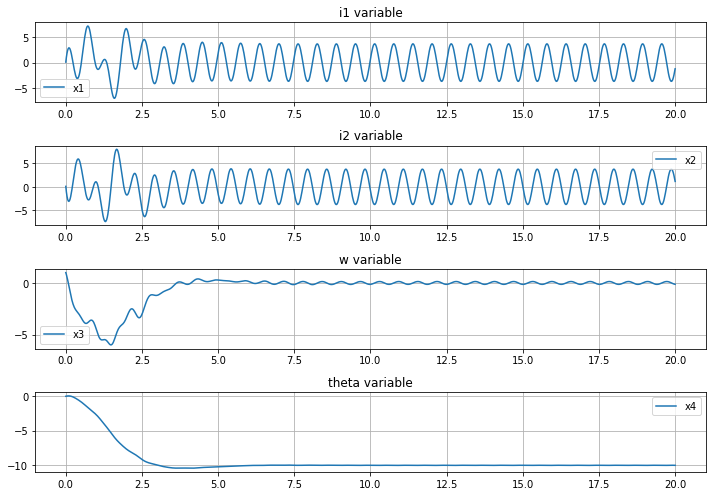

In [78]:
t = np.linspace(t0, t1, len(x[0]))

fig, ax = plt.subplots(4,1)
ax[0].set_title("i1 variable")
ax[0].plot(t, x[0], label='x1')
ax[0].grid()
ax[0].legend()

ax[1].set_title("i2 variable")
ax[1].plot(t, x[1], label='x2')
ax[1].grid()
ax[1].legend()

ax[2].set_title("w variable")
ax[2].plot(t, x[2], label='x3')
ax[2].grid()
ax[2].legend()

ax[3].set_title("theta variable")
ax[3].plot(t, x[3], label='x4')
ax[3].grid()
ax[3].legend()

fig.set_figheight(7)
fig.set_figwidth(10)
fig.tight_layout()


In [67]:
u

array([[[ 1.00000000e+00,  9.99799606e-01,  9.99198505e-01, ...,
          4.44299584e-01,  4.26276246e-01,  4.08082062e-01]],

       [[-1.83697020e-16,  2.00186827e-02,  4.00293422e-02, ...,
          8.95878273e-01,  9.04593037e-01,  9.12945251e-01]]])

In [45]:
x_new[0][0]

nan